# Capstone Project - The Battle of the Neighborhoods II 
## Applied Data Science Capstone by IBM/Coursera 

## I. Introduction

Despite the global economic impact of theCovid-19 Pandemic, Taiwan (Republic of China) has maintained robust economic growth. According to the Chung-Hua Institution for Economic Research (CIER), Taiwan's gross domestic product(GDP) has grown 2.38 percent in 2020 and will continue to grow by 3.73 percent in 2021.  Taiwan's economic freedom score is 77.1, making its economy the 11th freest in the 2020 Index of Economic freedom jointly issued by the Heritage Foundation and the Wall Street Journal . These aspects provide positive economic and market growth in 2021.  

Taiwan has a geographical area of 36,193 square kilometers, with a population of about23,476,640. It leads to an average population density of 649 people per square kilometer. Making it the 17th most densely populated country in the world.   Its capital city, Taipei, and New Taipei City are the two the most densely populated areas in the territory. In Taipei, 10, 000 people live in every square meter. With such high density, and a culture of overworking; dining and eating delicious food becomes the most preferred leisure activity of Taiwanese and resulting in the blossom of the restaurantion.  


This report will provide a glance for stakeholders who wish to open a new venue in northern Taiwan, where the most business opportunity gathered 

## I.I Problem and Discussion 

When it comes to open a new venue, different factors need to take into consideration. However, economic activities hugely rely on the population, human activity. Does the area have enough labor and demand for business? What about the economic activities in that area, the diversification? Diversity is the basis of economic stability and growth. A diverse economic environment will be more ideal for a restaurant business. This report attempts to provide some semblance to these questions based on the analytics of the data collected from public platforms. The questions have been narrowed to the follows:  

1. Which districts have a greater population density?  
3. Which districts have a better economic diversity? 
3. Which district has the most potential to open a venue? 
4. What business can be a good idea to open. 


## II. Data Preparation

### II.I Data Collection 

To understand better the business activity in Greater Taipei Area, we need to collect not only basic demography data, but also geographic data: 

Taipei and New Taipei geographic coordinate data can be found on [Taiwan opening government data platform](https://data.gov.tw/en)
[New Taipei City Municipal administration data](https://en.wikipedia.org/wiki/New_Taipei_City)
[Taipei City Municipal administration data](https://en.wikipedia.org/wiki/Taipei)
[Taipei and New Taipei Geojson data](https://github.com/littlebtc/geodata4appy/tree/master/simplified)
Exploratory data for venues in Taipei and new Taipei City: This part of data will be acquired by using the Foursquare API.  


### II.III Data Processing 

In this report, the pandas.read_html() function has been used as a scrapper to obtain the municipal administration data of Taipei and New Taipei City from Wikipedia. After reading the files into their Dataframes and cleaning, the population density has been calculated. After the calculation, the two tables (Taipei and New Taipei) have been combined by using append() function. The geographic coordinate data then eventually joined with the Dataframe using the join() function.

### Import necessary libraries 

In [1]:
import requests 
import pandas as pd
import numpy as np 

! pip install beautifulsoup4
! pip install lxml
! pip install html5lib
! pip install geopandas
import html5lib
from bs4 import BeautifulSoup
import geopandas as gpd

!pip install geopy 
from geopy.geocoders import Nominatim 

# Libraries for processing images 
#from Ipython.display import Image 
#from Ipython.core.display import HTML 

# Library for tranformign json file into a pandas dataframe 
from pandas.io.json import json_normalize 

# Plotting Library 
! pip install folium==0.5.0 
import folium 

# Matplolib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import K-means from clustering stage 
from sklearn.cluster import KMeans 

print('Libraries imported.')

     |████████████████████████████████| 994 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 5.5 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=635467aaac85dbf671695983c90cadb6ee3488cc0695e247ee447ab3655b3b91
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


### Web Scraping of New Taipei City Municipal administration data

In [2]:
table_NT = pd.read_html("https://en.wikipedia.org/wiki/New_Taipei_City", flavor = 'html5lib', match='Region')
df_nt = table_NT[0]
df_nt.rename(columns={'Name':'District', 'Area (km2)': 'Area_sq.km'}, inplace=True)
df_nt.head()

Region District Chinese  Taiwanese        Hakka  \
0  TamsuiRiverSouth[citation needed]  Banqiao     板橋區   Pang-kiô  Piông-khièu   
1  TamsuiRiverSouth[citation needed]  Zhonghe     中和區   Tiong-hô     Chûng-fò   
2  TamsuiRiverSouth[citation needed]   Yonghe     永和區     Éng-hô       Yún-fò   
3  TamsuiRiverSouth[citation needed]  Tucheng     土城區  Thô͘-siâⁿ     Thú-sàng   
4  TamsuiRiverSouth[citation needed]   Shulin     樹林區   Chhiū-nâ        Su-nà   

  Formosan  Population  Area_sq.km  
0      NaN      554008     23.1373  
1      NaN      414356     20.1440  
2      NaN      225353      5.7138  
3      NaN      238646     29.5578  
4      NaN      184329     33.1288

In [3]:
# list the data types for each column
print(df_nt.dtypes)

Region         object
District       object
Chinese        object
Taiwanese      object
Hakka          object
Formosan       object
Population      int64
Area_sq.km    float64
dtype: object


In [4]:
# we don't need other names except the English names  
df_nt_pop = df_nt.drop(['Region','Chinese','Taiwanese', 'Hakka', 'Formosan'], axis = 1)


# calculate the desity 
df_nt_pop['Density_sq.km'] = round(df_nt_pop['Population']/df_nt_pop['Area_sq.km']) 
df_nt_pop

District  Population  Area_sq.km  Density_sq.km
0     Banqiao      554008     23.1373        23944.0
1     Zhonghe      414356     20.1440        20570.0
2      Yonghe      225353      5.7138        39440.0
3     Tucheng      238646     29.5578         8074.0
4      Shulin      184329     33.1288         5564.0
5      Sanxia      112775    191.4508          589.0
6      Yingge       87931     21.1248         4162.0
7   Xinzhuang      413443     19.7383        20946.0
8    Sanchong      388386     16.3170        23803.0
9      Luzhou      200055      8.3210        24042.0
10       Wugu       82983     34.8632         2380.0
11    Taishan       78801     19.1603         4113.0
12     Linkou      100554     54.1519         1857.0
13     Tamsui      162441     70.6565         2299.0
14       Bali       37711     39.4933          955.0
15     Sanzhi       23452     65.9909          355.0
16     Shimen       12645     51.2645          247.0
17    Jinshan       22273     49.2132          453.0
18      Wanli       22634     63.3766          357.0
19      Xizhi      196150     71.2354         2754.0
20    Ruifang       40922     70.7336          579.0
21   Gongliao       12858     99.9734          129.0
22     Pingxi        4872     71.3382           68.0
23   Shuangxi        9233    146.2484           63.0
24    Xindian      300283    120.2255         2498.0
25   Shenkeng       23614     20.5787         1147.0
26    Shiding        7857    144.3498           54.0
27    Pinglin        6503    170.8350           38.0
28      Wulai        6182    321.1306           19.0

In [5]:
df_nt_pop.shape

(29, 4)

### Web Scraping of Taipei City Municipal administration data

In [6]:
table_T = pd.read_html("https://en.wikipedia.org/wiki/Taipei", flavor = 'html5lib', match='Map', header=1)
df_t = table_T[0]
df_t.head()

Map             Name[98]  \
0  Beitou Shilin Neihu Zhongshan Song-shan Datong...               Beitou   
1  Beitou Shilin Neihu Zhongshan Song-shan Datong...  Daan (Da-an, Da'an)   
2  Beitou Shilin Neihu Zhongshan Song-shan Datong...               Datong   
3  Beitou Shilin Neihu Zhongshan Song-shan Datong...    Nangang (Nankang)   
4  Beitou Shilin Neihu Zhongshan Song-shan Datong...                Neihu   

  Chinese[99]   Pinyin Wade–Giles Pe̍h-ōe-jī  Population(Jan. 2016)  \
0         北投區   Běitóu   Pei-t'ou    Pak-tâu                 257922   
1         大安區    Dà'ān      Ta-an     Tāi-an                 312909   
2         大同區   Dàtóng   Ta-t'ung   Tāi-tông                 131029   
3         南港區  Nángǎng   Nan-kang   Lâm-káng                 122296   
4         內湖區    Nèihú     Nei-hu     Lāi-ô͘                 287726   

   Area(km2)  Postalcode  
0    56.8216         112  
1    11.3614         106  
2     5.6815         103  
3    21.8424         115  
4    31.5787         114

In [7]:
print(df_t.dtypes)

Map                       object
Name[98]                  object
Chinese[99]               object
Pinyin                    object
Wade–Giles                object
Pe̍h-ōe-jī                object
Population(Jan. 2016)      int64
Area(km2)                float64
Postalcode                 int64
dtype: object


In [8]:
# use filter function to keep only the columns needed 
df_tai_pop = df_t.filter(['Name[98]', 'Population(Jan. 2016)', 'Area(km2)'], axis=1)
df_tai_pop.rename(columns={'Name[98]':'District', 'Population(Jan. 2016)':'Population', 'Area(km2)':'Area_sq.km'}, inplace=True) 

#calculate the desity 

df_tai_pop['Density_sq.km'] = round(df_tai_pop['Population']/df_tai_pop['Area_sq.km'])
df_tai_pop.head(5)

District  Population  Area_sq.km  Density_sq.km
0               Beitou      257922     56.8216         4539.0
1  Daan (Da-an, Da'an)      312909     11.3614        27541.0
2               Datong      131029      5.6815        23062.0
3    Nangang (Nankang)      122296     21.8424         5599.0
4                Neihu      287726     31.5787         9111.0

In [9]:
df_tai_pop.shape

(12, 4)

There are some alias in distict names. This will create problems when merging the tables, so we have to rename the index.  

In [10]:
print('These districts are - ' + str(list(df_tai_pop['District'].unique())))

These districts are - ['Beitou', "Daan (Da-an, Da'an)", 'Datong', 'Nangang (Nankang)', 'Neihu', 'Shilin', 'Songshan', 'Wanhua', 'Wenshan', 'Xinyi', 'Zhongshan', 'Zhongzheng']


In [11]:
df_tai_pop.iloc[1,0]= 'Daan' 
df_tai_pop.iloc[3,0]= 'Nangang' 

### Download the geographic coordinates dataset 

In [13]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


# This part has been removed for sharing purpose

body = client_7bb8890b4f054ac7aa437342dad169cc.get_object(Bucket='courseracapstone-donotdelete-pr-8pabfiakmqkxl8',Key='Taipei_GeoCoordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


tp_geo = pd.read_csv(body, sep=';')
tp_geo.columns = ['District', 'Postal Code', 'Longitude', 'Latitude']
tp_geo

District  Postal Code   Longitude   Latitude
0   Zhongzheng          100  121.519884  25.032405
1       Datong          103  121.513042  25.063424
2    Zhongshan          104  121.538160  25.069699
3     Songshan          105  121.557588  25.059991
4         Daan          106  121.543445  25.026770
5       Wanhua          108  121.497986  25.028590
6        Xinyi          110  121.571670  25.030621
7       Shilin          111  121.550847  25.125467
8       Beitou          112  121.517799  25.148068
9        Neihu          114  121.592383  25.083706
10     Nangang          115  121.609757  25.036009
11     Wenshan          116  121.573608  24.988579
12       Wanli          207  121.643931  25.175725
13     Jinshan          208  121.605264  25.217146
14     Banqiao          220  121.457968  25.011865
15       Xizhi          221  121.654699  25.073313
16    Shenkeng          222  121.620062  24.997675
17     Shiding          223  121.647228  24.947141
18     Ruifang          224  121.823202  25.098129
19      Pingxi          226  121.757882  25.026071
20    Shuangxi          227  121.832982  24.996984
21    Gongliao          228  121.918247  25.024856
22     Xindian          231  121.531656  24.930390
23     Pinglin          232  121.724223  24.910971
24       Wulai          233  121.541481  24.788243
25      Yonghe          234  121.516745  25.008102
26     Zhonghe          235  121.493674  24.990880
27     Tucheng          236  121.445737  24.964251
28      Sanxia          237  121.416309  24.882098
29      Shulin          238  121.401034  24.979706
30      Yingge          239  121.346627  24.956626
31    Sanchong          241  121.487098  25.062817
32   Xinzhuang          242  121.436753  25.035830
33     Taishan          243  121.416278  25.055498
34      Linkou          244  121.352724  25.100087
35      Luzhou          247  121.471246  25.089272
36        Wugu          248  121.433214  25.096147
37        Bali          249  121.413836  25.138128
38      Tamsui          251  121.463904  25.189076
39      Sanzhi          252  121.515558  25.231599
40      Shimen          253  121.569276  25.265181

In [14]:
print(tp_geo.shape)

(41, 4)


### Download New Taiepi Area geojson file 

In [15]:
streaming_body_1 = client_7bb8890b4f054ac7aa437342dad169cc.get_object(Bucket='courseracapstone-donotdelete-pr-8pabfiakmqkxl8', Key='new_taipei.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1) 
    
new_taipei_geo = gpd.read_file(streaming_body_1)
new_taipei_geo.head()

AREA    PERIMETER  ROADLC_  ROADLC_ID             X             Y  \
0  4.468713e+06  12600.87051        2          0  304128.84362  2.797183e+06   
1  4.953612e+06  16493.23365        3          0  307930.65607  2.796113e+06   
2  8.638139e+06  19620.29490        4          0  309232.01461  2.794265e+06   
3  1.051610e+07  21052.34218        5          0  307076.00692  2.794012e+06   
4  4.618913e+06  13141.66028        6          0  307391.90611  2.795769e+06   

         AREA_1   PERIMETE_1  ROADLC_1  ROADLC_I_1  ...  ADMIT_ID  ADMIV  \
0  4.468713e+06  12600.87051         2           0  ...        22    富基里   
1  4.953612e+06  16493.23365         3           0  ...        22    尖鹿里   
2  8.638139e+06  19620.29490         4           0  ...        22    乾華里   
3  1.051610e+07  21052.34218         5           0  ...        22    山溪里   
4  4.618913e+06  13141.66028         6           0  ...        22    石門里   

  ADMIV_ID          TM2X          TM2Y         MAX_X         MAX_Y  \
0      002  304128.84362  2.797183e+06  305173.06233  2.799082e+06   
1      006  307930.65607  2.796113e+06  308945.59355  2.798947e+06   
2      007  309232.01461  2.794265e+06  310020.59348  2.798416e+06   
3      004  307076.00692  2.794012e+06  307822.53118  2.798316e+06   
4      005  307391.90611  2.795769e+06  308696.81230  2.798259e+06   

          MIN_X         MIN_Y  \
0  303084.62492  2.795285e+06   
1  306915.71858  2.793279e+06   
2  307232.81227  2.790114e+06   
3  305057.28144  2.789709e+06   
4  306086.99991  2.793279e+06   

                                            geometry  
0  POLYGON ((121.52712 25.28567, 121.52997 25.286...  
1  POLYGON ((121.56611 25.29156, 121.56860 25.296...  
2  POLYGON ((121.58536 25.29350, 121.58864 25.291...  
3  POLYGON ((121.54819 25.29159, 121.55035 25.290...  
4  POLYGON ((121.55697 25.29209, 121.56092 25.291...  

[5 rows x 26 columns]

### Download Taipei Area geojson file 

In [16]:
streaming_body_2 = client_7bb8890b4f054ac7aa437342dad169cc.get_object(Bucket='courseracapstone-donotdelete-pr-8pabfiakmqkxl8', Key='taipei.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 

taipei_geo = gpd.read_file(streaming_body_2)
taipei_geo.head()

AREA   PERIMETER  ROADLC_  ROADLC_ID             X             Y  \
0  1.281570e+06  7845.48419     2528          0  305274.35890  2.774201e+06   
1  2.593486e+05  2158.12973     3369          0  305536.83356  2.772927e+06   
2  1.345430e+05  1906.84462     3333          0  305835.64963  2.772981e+06   
3  1.151300e+05  1552.06662     3297          0  306387.36347  2.773104e+06   
4  9.981312e+04  1351.73546     3320          0  306152.31677  2.773055e+06   

   ID SECT_NAME SECT_CODE LIE_NAME  ...  TVNAME   TM2_MAX_X   TM2_MAX_Y  \
0   1       松山區   6300100      莊敬里  ...  松山區莊敬里  306872.396  2774513.48   
1   2       松山區   6300100      東榮里  ...  松山區東榮里  305826.480  2773016.54   
2   3       松山區   6300100      三民里  ...  松山區三民里  306034.751  2773058.88   
3   4       松山區   6300100      新益里  ...  松山區新益里  306576.763  2773140.36   
4   5       松山區   6300100      富錦里  ...  松山區富錦里  306268.441  2773089.68   

    TM2_MIN_X   TM2_MIN_Y MAX_X MAX_Y MIN_X  MIN_Y  \
0  304646.856  2773070.43  None  None  None   None   
1  305121.928  2772546.69  None  None  None   None   
2  305685.570  2772383.59  None  None  None   None   
3  306172.861  2772665.41  None  None  None   None   
4  305977.061  2772621.37  None  None  None   None   

                                            geometry  
0  POLYGON ((121.56824 25.06362, 121.56499 25.063...  
1  POLYGON ((121.55522 25.05830, 121.55457 25.061...  
2  POLYGON ((121.56338 25.05895, 121.56360 25.056...  
3  POLYGON ((121.56559 25.06053, 121.56499 25.063...  
4  POLYGON ((121.56338 25.05895, 121.56305 25.062...  

[5 rows x 36 columns]

After checking the data structure, we now can merge the Taipei and New Taipei poplution density dataframes

In [17]:
df_gtp_pop= df_nt_pop.append(df_tai_pop, ignore_index=True)
df_gtp_pop

District  Population  Area_sq.km  Density_sq.km
0      Banqiao      554008     23.1373        23944.0
1      Zhonghe      414356     20.1440        20570.0
2       Yonghe      225353      5.7138        39440.0
3      Tucheng      238646     29.5578         8074.0
4       Shulin      184329     33.1288         5564.0
5       Sanxia      112775    191.4508          589.0
6       Yingge       87931     21.1248         4162.0
7    Xinzhuang      413443     19.7383        20946.0
8     Sanchong      388386     16.3170        23803.0
9       Luzhou      200055      8.3210        24042.0
10        Wugu       82983     34.8632         2380.0
11     Taishan       78801     19.1603         4113.0
12      Linkou      100554     54.1519         1857.0
13      Tamsui      162441     70.6565         2299.0
14        Bali       37711     39.4933          955.0
15      Sanzhi       23452     65.9909          355.0
16      Shimen       12645     51.2645          247.0
17     Jinshan       22273     49.2132          453.0
18       Wanli       22634     63.3766          357.0
19       Xizhi      196150     71.2354         2754.0
20     Ruifang       40922     70.7336          579.0
21    Gongliao       12858     99.9734          129.0
22      Pingxi        4872     71.3382           68.0
23    Shuangxi        9233    146.2484           63.0
24     Xindian      300283    120.2255         2498.0
25    Shenkeng       23614     20.5787         1147.0
26     Shiding        7857    144.3498           54.0
27     Pinglin        6503    170.8350           38.0
28       Wulai        6182    321.1306           19.0
29      Beitou      257922     56.8216         4539.0
30        Daan      312909     11.3614        27541.0
31      Datong      131029      5.6815        23062.0
32     Nangang      122296     21.8424         5599.0
33       Neihu      287726     31.5787         9111.0
34      Shilin      290682     62.3682         4661.0
35    Songshan      209689      9.2878        22577.0
36      Wanhua      194314      8.8522        21951.0
37     Wenshan      275433     31.5090         8741.0
38       Xinyi      229139     11.2077        20445.0
39   Zhongshan      231286     13.6821        16904.0
40  Zhongzheng      162549      7.6071        21368.0

Then, we merge it with the geo coordinates dataset 

In [18]:
df_gtp = tp_geo.join(df_gtp_pop.set_index('District'), on='District')
df_gtp

District  Postal Code   Longitude   Latitude  Population  Area_sq.km  \
0   Zhongzheng          100  121.519884  25.032405      162549      7.6071   
1       Datong          103  121.513042  25.063424      131029      5.6815   
2    Zhongshan          104  121.538160  25.069699      231286     13.6821   
3     Songshan          105  121.557588  25.059991      209689      9.2878   
4         Daan          106  121.543445  25.026770      312909     11.3614   
5       Wanhua          108  121.497986  25.028590      194314      8.8522   
6        Xinyi          110  121.571670  25.030621      229139     11.2077   
7       Shilin          111  121.550847  25.125467      290682     62.3682   
8       Beitou          112  121.517799  25.148068      257922     56.8216   
9        Neihu          114  121.592383  25.083706      287726     31.5787   
10     Nangang          115  121.609757  25.036009      122296     21.8424   
11     Wenshan          116  121.573608  24.988579      275433     31.5090   
12       Wanli          207  121.643931  25.175725       22634     63.3766   
13     Jinshan          208  121.605264  25.217146       22273     49.2132   
14     Banqiao          220  121.457968  25.011865      554008     23.1373   
15       Xizhi          221  121.654699  25.073313      196150     71.2354   
16    Shenkeng          222  121.620062  24.997675       23614     20.5787   
17     Shiding          223  121.647228  24.947141        7857    144.3498   
18     Ruifang          224  121.823202  25.098129       40922     70.7336   
19      Pingxi          226  121.757882  25.026071        4872     71.3382   
20    Shuangxi          227  121.832982  24.996984        9233    146.2484   
21    Gongliao          228  121.918247  25.024856       12858     99.9734   
22     Xindian          231  121.531656  24.930390      300283    120.2255   
23     Pinglin          232  121.724223  24.910971        6503    170.8350   
24       Wulai          233  121.541481  24.788243        6182    321.1306   
25      Yonghe          234  121.516745  25.008102      225353      5.7138   
26     Zhonghe          235  121.493674  24.990880      414356     20.1440   
27     Tucheng          236  121.445737  24.964251      238646     29.5578   
28      Sanxia          237  121.416309  24.882098      112775    191.4508   
29      Shulin          238  121.401034  24.979706      184329     33.1288   
30      Yingge          239  121.346627  24.956626       87931     21.1248   
31    Sanchong          241  121.487098  25.062817      388386     16.3170   
32   Xinzhuang          242  121.436753  25.035830      413443     19.7383   
33     Taishan          243  121.416278  25.055498       78801     19.1603   
34      Linkou          244  121.352724  25.100087      100554     54.1519   
35      Luzhou          247  121.471246  25.089272      200055      8.3210   
36        Wugu          248  121.433214  25.096147       82983     34.8632   
37        Bali          249  121.413836  25.138128       37711     39.4933   
38      Tamsui          251  121.463904  25.189076      162441     70.6565   
39      Sanzhi          252  121.515558  25.231599       23452     65.9909   
40      Shimen          253  121.569276  25.265181       12645     51.2645   

    Density_sq.km  
0         21368.0  
1         23062.0  
2         16904.0  
3         22577.0  
4         27541.0  
5         21951.0  
6         20445.0  
7          4661.0  
8          4539.0  
9          9111.0  
10         5599.0  
11         8741.0  
12          357.0  
13          453.0  
14        23944.0  
15         2754.0  
16         1147.0  
17           54.0  
18          579.0  
19           68.0  
20           63.0  
21          129.0  
22         2498.0  
23           38.0  
24           19.0  
25        39440.0  
26        20570.0  
27         8074.0  
28          589.0  
29         5564.0  
30         4162.0  
31        23803.0  
32        20946.0  
33         4113.0  
34         1857.0  
35       

In [19]:
df_gtp.shape

(41, 7)

In [20]:
print('Greater Taipei Area has {} districts'.format(len(df_gtp['District'].unique())),'These districts are - ' + str(list(df_gtp['District'].unique())))

Greater Taipei Area has 41 districts These districts are - ['Zhongzheng', 'Datong', 'Zhongshan', 'Songshan', 'Daan', 'Wanhua', 'Xinyi', 'Shilin', 'Beitou', 'Neihu', 'Nangang', 'Wenshan', 'Wanli', 'Jinshan', 'Banqiao', 'Xizhi', 'Shenkeng', 'Shiding', 'Ruifang', 'Pingxi', 'Shuangxi', 'Gongliao', 'Xindian', 'Pinglin', 'Wulai', 'Yonghe', 'Zhonghe', 'Tucheng', 'Sanxia', 'Shulin', 'Yingge', 'Sanchong', 'Xinzhuang', 'Taishan', 'Linkou', 'Luzhou', 'Wugu', 'Bali', 'Tamsui', 'Sanzhi', 'Shimen']


In [21]:
# check the data types 
print(df_gtp.dtypes)

District          object
Postal Code        int64
Longitude        float64
Latitude         float64
Population         int64
Area_sq.km       float64
Density_sq.km    float64
dtype: object


Finally, we merge the two geojson datasets 

In [22]:
taipei_geo.rename(columns={'SECT_NAME':'District'}, inplace=True)
new_taipei_geo.rename(columns={'ADMIT':'District'}, inplace=True)
gtaipei_geo = taipei_geo.append(new_taipei_geo) 
gtaipei_geo.head()

AREA   PERIMETER  ROADLC_  ROADLC_ID             X             Y  \
0  1.281570e+06  7845.48419     2528          0  305274.35890  2.774201e+06   
1  2.593486e+05  2158.12973     3369          0  305536.83356  2.772927e+06   
2  1.345430e+05  1906.84462     3333          0  305835.64963  2.772981e+06   
3  1.151300e+05  1552.06662     3297          0  306387.36347  2.773104e+06   
4  9.981312e+04  1351.73546     3320          0  306152.31677  2.773055e+06   

    ID District SECT_CODE LIE_NAME  ... X_1  Y_1 CAT_ID  T_NAME ALIAS  \
0  1.0      松山區   6300100      莊敬里  ... NaN  NaN    NaN     NaN   NaN   
1  2.0      松山區   6300100      東榮里  ... NaN  NaN    NaN     NaN   NaN   
2  3.0      松山區   6300100      三民里  ... NaN  NaN    NaN     NaN   NaN   
3  4.0      松山區   6300100      新益里  ... NaN  NaN    NaN     NaN   NaN   
4  5.0      松山區   6300100      富錦里  ... NaN  NaN    NaN     NaN   NaN   

  ADMIT_ID ADMIV ADMIV_ID  TM2X  TM2Y  
0      NaN   NaN      NaN   NaN   NaN  
1      NaN   NaN      NaN   NaN   NaN  
2      NaN   NaN      NaN   NaN   NaN  
3      NaN   NaN      NaN   NaN   NaN  
4      NaN   NaN      NaN   NaN   NaN  

[5 rows x 50 columns]

Replace the Distrtict names with the English names

In [23]:
replacements =  {'松山區':'Songshan', '北投區': 'Beitou', '大安區':'Daan','大同區':'Datong', '南港區':'Nangang', '內湖區':'Neihu', '士林區':'Shilin',
               '萬華區': 'Wanhua', '信義區':'Xinyi', '中山區':'Zhongshan', '中正區': 'Zhongzheng', '板橋區':'Banqiao','中和區':'Zhonghe', '永和區':'Yonghe', 
               '土城區': 'Tucheng', '樹林區':'Shulin', '三峽區':'Sanxia', '鶯歌區':'Yingge','新莊區':'Xinzhuang','三重區':'Sanchong','蘆洲區':'Luzhou',
                '五股區':'Wugu', '泰山區':'Taishan','林口區':'Linkou','淡水區':'Tamsui','八里區':'Bali','三芝區':'Sanzhi','石門區':'Shimen','金山區':'Jinshan',
                '萬里區':'Wanli','汐止區':'Xizhi','瑞芳區':'Ruifang','貢寮區':'Gongliao','平溪區':'Pingxi','雙溪區':'Shuangxi','新店區':'Xindian',
                '深坑區':'Shenkeng','石碇區':'Shiding','坪林區':'Pinglin','烏來區':'Wulai'}

for index, row in gtaipei_geo.iterrows():
    cn = row['District']
    for name in replacements: 
        if name == cn:
            gtaipei_geo.loc[index , 'District'] = replacements[name]
            
gtaipei_geo

AREA    PERIMETER  ROADLC_  ROADLC_ID             X  \
0     1.281570e+06   7845.48419     2528          0  305274.35890   
1     2.593486e+05   2158.12973     3369          0  305536.83356   
2     1.345430e+05   1906.84462     3333          0  305835.64963   
3     1.151300e+05   1552.06662     3297          0  306387.36347   
4     9.981312e+04   1351.73546     3320          0  306152.31677   
...            ...          ...      ...        ...           ...   
1027  7.845744e+07  46965.23981     1034          0  313433.34357   
1028  2.508367e+07  21792.93549     1035          0  302600.57815   
1029  1.899392e+08  65153.74761     1036          0  301646.28110   
1030  1.910931e+05   2277.95429      241          0  313759.25905   
1031  2.599665e+05   3035.23962       80          0  295082.16516   

                 Y   ID District SECT_CODE LIE_NAME  ...           X_1  \
0     2.774201e+06  1.0   Shimen   6300100      莊敬里  ...           NaN   
1     2.772927e+06  2.0   Shimen   6300100      東榮里  ...           NaN   
2     2.772981e+06  3.0   Shimen   6300100      三民里  ...           NaN   
3     2.773104e+06  4.0   Shimen   6300100      新益里  ...           NaN   
4     2.773055e+06  5.0   Shimen   6300100      富錦里  ...           NaN   
...            ...  ...      ...       ...      ...  ...           ...   
1027  2.746730e+06  NaN    Wulai       NaN      NaN  ...  313433.34357   
1028  2.746744e+06  NaN    Wulai       NaN      NaN  ...  302600.57815   
1029  2.738600e+06  NaN    Wulai       NaN      NaN  ...  301646.28110   
1030  2.774317e+06  NaN    Xizhi       NaN      NaN  ...  313759.25905   
1031  2.784668e+06  NaN   Tamsui       NaN      NaN  ...  295082.16516   

               Y_1 CAT_ID  T_NAME ALIAS ADMIT_ID ADMIV ADMIV_ID          TM2X  \
0              NaN    NaN     NaN   NaN      NaN   NaN      NaN           NaN   
1              NaN    NaN     NaN   NaN      NaN   NaN      NaN           NaN   
2              NaN    NaN     NaN   NaN      NaN   NaN      NaN           NaN   
3              NaN    NaN     NaN   NaN      NaN   NaN      NaN           NaN   
4              NaN    NaN     NaN   NaN      NaN   NaN      NaN           NaN   
...            ...    ...     ...   ...      ...   ...      ...           ...   
1027  2.746730e+06      A     孝義里   孝義里       29   孝義里      005  313433.34357   
1028  2.746744e+06      A     信賢里   信賢里       29   信賢里      004  302600.57815   
1029  2.738600e+06      A     福山里   福山里       29   福山里      003  301646.28110   
1030  2.774317e+06      A     湖蓮里   湖蓮里       11   湖蓮里      049  313684.97344   
1031  2.784668e+06      A     幸福里   幸福里       10   幸福里      040  295070.51721   

              TM2Y  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1027  2.746730e+06  
1028  2.746744e+06  
1029  2.738600e+06  
1030  2.774301e+06  
1031  2.784387e+06  

[1488 rows x 50 columns]

## III Data Analysis

### III.I The population density

Let's find out the top 10 highest populated district and visualise it by using Histogram

In [24]:
df_pop = df_gtp.copy()
df_pop.sort_values('Population', ascending = False, inplace=True)
df_top10 = df_pop.head(10)
df_top10

District  Postal Code   Longitude   Latitude  Population  Area_sq.km  \
14    Banqiao          220  121.457968  25.011865      554008     23.1373   
26    Zhonghe          235  121.493674  24.990880      414356     20.1440   
32  Xinzhuang          242  121.436753  25.035830      413443     19.7383   
31   Sanchong          241  121.487098  25.062817      388386     16.3170   
4        Daan          106  121.543445  25.026770      312909     11.3614   
22    Xindian          231  121.531656  24.930390      300283    120.2255   
7      Shilin          111  121.550847  25.125467      290682     62.3682   
9       Neihu          114  121.592383  25.083706      287726     31.5787   
11    Wenshan          116  121.573608  24.988579      275433     31.5090   
8      Beitou          112  121.517799  25.148068      257922     56.8216   

    Density_sq.km  
14        23944.0  
26        20570.0  
32        20946.0  
31        23803.0  
4         27541.0  
22         2498.0  
7          4661.0  
9          9111.0  
11         8741.0  
8          4539.0

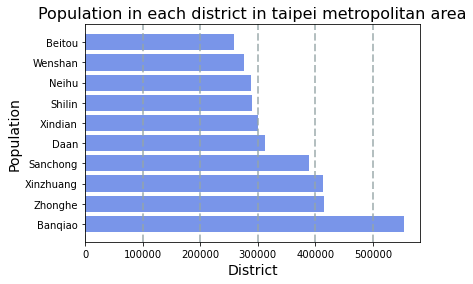

In [25]:
pop = df_top10['Population']
dis = df_top10['District']

plt.barh(dis, pop.values, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)

plt.xlabel('District', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Population in each district in taipei metropolitan area', fontsize=16)

plt.show()

In [26]:
df_den = df_gtp.copy()
df_den.sort_values('Density_sq.km', ascending = False, inplace=True) 
df_den_top10 = df_den.head(10)
df_den_top10

District  Postal Code   Longitude   Latitude  Population  Area_sq.km  \
25      Yonghe          234  121.516745  25.008102      225353      5.7138   
4         Daan          106  121.543445  25.026770      312909     11.3614   
35      Luzhou          247  121.471246  25.089272      200055      8.3210   
14     Banqiao          220  121.457968  25.011865      554008     23.1373   
31    Sanchong          241  121.487098  25.062817      388386     16.3170   
1       Datong          103  121.513042  25.063424      131029      5.6815   
3     Songshan          105  121.557588  25.059991      209689      9.2878   
5       Wanhua          108  121.497986  25.028590      194314      8.8522   
0   Zhongzheng          100  121.519884  25.032405      162549      7.6071   
32   Xinzhuang          242  121.436753  25.035830      413443     19.7383   

    Density_sq.km  
25        39440.0  
4         27541.0  
35        24042.0  
14        23944.0  
31        23803.0  
1         23062.0  
3         22577.0  
5         21951.0  
0         21368.0  
32        20946.0

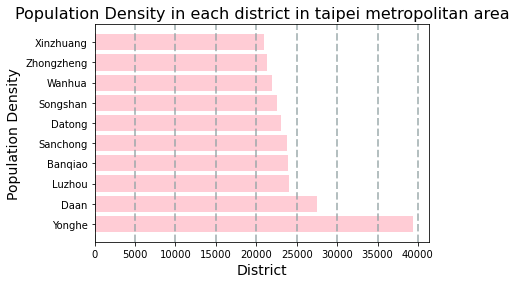

In [27]:
pop_den = df_den_top10['Density_sq.km']
dis_den = df_den_top10['District']

plt.barh(dis_den, pop_den.values, color='pink', alpha=0.8)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)

plt.xlabel('District', fontsize = 14)
plt.ylabel('Population Density', fontsize = 14)
plt.title('Population Density in each district in taipei metropolitan area', fontsize=16)

plt.show()

#### Use geopy library to get the latitude and longitude values of Taipei City 

In [28]:
address = 'Taipei City, TW'
geolocator = Nominatim(user_agent="tw_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude 
print('The geographical coordinate of Taipei City are {},{}'. format(latitude, longitude))

The geographical coordinate of Taipei City are 25.0375198,121.5636796


### Gernerate a choropleth map using the density of each district and with all districts superimposed on top 

In [29]:
threshold_scale = np.linspace(df_gtp['Density_sq.km'].min(),
                              df_gtp['Density_sq.km'].max(),
                             6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list

threshold_scale[-1] = threshold_scale[-1] + 1

map_gtp = folium.Map(location=[latitude, longitude], zoom_start = 10, tiles='Mapbox Bright')

map_gtp.choropleth(
    geo_data=gtaipei_geo,
    data=df_gtp,
    columns=['District', 'Density_sq.km'],
    key_on='feature.properties.District',
    threshold_scale = threshold_scale, 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population density in each district in taipei metropolitan area',
    reset = True
)

for lat, lng, districts in zip (df_gtp['Latitude'], df_gtp['Longitude'], df_gtp['District']):
    label = '{}'.format(districts)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    parse_html = False
    ).add_to(map_gtp)

# display map
map_gtp

### In case of image not showing 
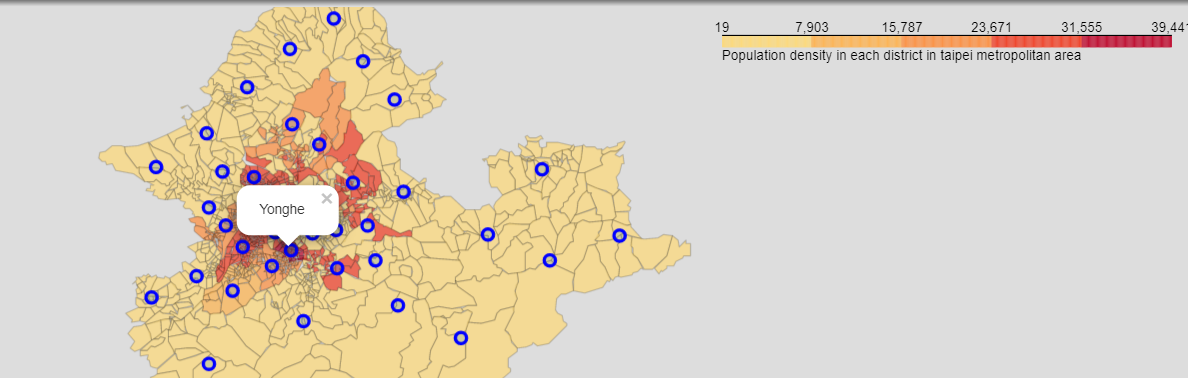

### Foursquare API 

In [30]:
CLIENT_ID = '---' # your Foursquare ID
CLIENT_SECRET = '---' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: I1G0RX3YZDY0XK0H0JN1R3VFFOTFDBXPM4UTYGQNVDDYL0X1
CLIENT_SECRET:FVWJQS1MJCGATUPEGUY3LJX4THUJXKMGT2BG1QF2PLEJISVG


### To explore the first district in Greater Taipei Area 
Get the district's name and geographical coordinations. 

In [31]:
df_gtp.loc[0, 'District']

'Zhongzheng'

In [32]:
District_lat = df_gtp.loc[0, 'Latitude']
District_lng = df_gtp.loc[0, 'Longitude']
District_name = df_gtp.loc[0, 'District']
print('Latitude and Longitude values of {} are {} and {}.'.format(District_name, District_lat, District_lat))

Latitude and Longitude values of Zhongzheng are 25.03240487 and 25.03240487.


#### The venues in Zhongzhen  district within a radius of 500 meters 

In [33]:
radius = 500 
url = url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, District_lat, District_lng, VERSION, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6040f1818675981deb402ff0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Zhōngzhèng Qū',
  'headerFullLocation': 'Zhōngzhèng Qū, Taipei',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 25.036904874500006,
    'lng': 121.52484114316205},
   'sw': {'lat': 25.027904865499995, 'lng': 121.51492665683797}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8e4566f964a520891d33e3',
       'name': 'Kinfen Braised Pork Rice (金峰魯肉飯)',
       'location': {'address': '羅斯福路一段10號',
        'lat': 25.03219410314086,
        'lng': 121.51853364691742,
        'labeledLatLngs': [{'label': 'display',
  

In [34]:
# Use get_category_type function to extract the category of the venu 

def get_category_type(row):
    try: 
        categories_list = row['categories']
    except: 
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else: 
        return categories_list[0]['name']
    
# Clean the json file and structure it into a pandas dataframe 
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

## filter columns 
filtered_col = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_col]

## filter the category for each row 
nearby_venues ['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

## clean columns 
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


name            categories        lat  \
0       Kinfen Braised Pork Rice (金峰魯肉飯)  Taiwanese Restaurant  25.032194   
1  Chiang Kai-Shek Memorial Hall (中正紀念堂)   Monument / Landmark  25.034555   
2              樂田麵包屋 Gakuden Boulangerie                Bakery  25.032757   
3               National Theater (國家戲劇院)               Theater  25.035197   
4                            臻味赤肉胡椒餅 烤地瓜                Bakery  25.033022   

          lng  
0  121.518534  
1  121.521835  
2  121.517534  
3  121.518188  
4  121.518246

In [35]:
print('{} venues are returned by Foursquare.'.format(nearby_venues.shape[0]))

33 venues are returned by Foursquare.


### To explore every districts in Greater Taipei Area 

We create a function to repeat the same process to all the districts in Taipei 

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

taipei_venues = getNearbyVenues(names=df_gtp['District'], latitudes =df_gtp['Latitude'], longitudes =df_gtp['Longitude'])

Zhongzheng
Datong
Zhongshan
Songshan
Daan
Wanhua
Xinyi
Shilin
Beitou
Neihu
Nangang
Wenshan
Wanli
Jinshan
Banqiao
Xizhi
Shenkeng
Shiding
Ruifang
Pingxi
Shuangxi
Gongliao
Xindian
Pinglin
Wulai
Yonghe
Zhonghe
Tucheng
Sanxia
Shulin
Yingge
Sanchong
Xinzhuang
Taishan
Linkou
Luzhou
Wugu
Bali
Tamsui
Sanzhi
Shimen


In [37]:
print(taipei_venues.shape)
taipei_venues

(340, 7)


District  District Latitude  District Longitude  \
0    Zhongzheng          25.032405          121.519884   
1    Zhongzheng          25.032405          121.519884   
2    Zhongzheng          25.032405          121.519884   
3    Zhongzheng          25.032405          121.519884   
4    Zhongzheng          25.032405          121.519884   
..          ...                ...                 ...   
335      Luzhou          25.089272          121.471246   
336      Luzhou          25.089272          121.471246   
337      Luzhou          25.089272          121.471246   
338      Luzhou          25.089272          121.471246   
339      Sanzhi          25.231599          121.515558   

                                             Venue  Venue Latitude  \
0                 Kinfen Braised Pork Rice (金峰魯肉飯)       25.032194   
1            Chiang Kai-Shek Memorial Hall (中正紀念堂)       25.034555   
2                        樂田麵包屋 Gakuden Boulangerie       25.032757   
3                         National Theater (國家戲劇院)       25.035197   
4                                      臻味赤肉胡椒餅 烤地瓜       25.033022   
..                                             ...             ...   
335                           星巴克 STARBUCKS 蘆洲三民門市       25.087397   
336                                肯德基 KFC（蘆洲三民餐廳）       25.087043   
337  捷運三民高中站 MRT Sanmin Senior High School Station       25.085741   
338                                          阿郎切仔麵       25.085250   
339                                          八連溪水車       25.233907   

     Venue Longitude        Venue Category  
0         121.518534  Taiwanese Restaurant  
1         121.521835   Monument / Landmark  
2         121.517534                Bakery  
3         121.518188               Theater  
4         121.518246                Bakery  
..               ...                   ...  
335       121.471177           Coffee Shop  
336       121.471592   Fried Chicken Joint  
337       121.473080         Metro Station  
338       121.473254          Noodle House  
339       121.514404                  Park  

[340 rows x 7 columns]

In [38]:
taipei_venues.groupby('District').count()

District Latitude  District Longitude  Venue  Venue Latitude  \
District                                                                   
Banqiao                    35                  35     35              35   
Daan                       38                  38     38              38   
Datong                     19                  19     19              19   
Jinshan                     3                   3      3               3   
Luzhou                      4                   4      4               4   
Nangang                     5                   5      5               5   
Neihu                      27                  27     27              27   
Sanchong                    7                   7      7               7   
Sanzhi                      1                   1      1               1   
Shenkeng                    3                   3      3               3   
Shilin                      1                   1      1               1   
Shuangxi                    1                   1      1               1   
Shulin                      1                   1      1               1   
Songshan                   53                  53     53              53   
Tucheng                     1                   1      1               1   
Wanhua                      7                   7      7               7   
Wanli                       1                   1      1               1   
Wenshan                    25                  25     25              25   
Xinyi                      20                  20     20              20   
Xinzhuang                   8                   8      8               8   
Xizhi                       1                   1      1               1   
Yingge                      2                   2      2               2   
Yonghe                     22                  22     22              22   
Zhonghe                     8                   8      8               8   
Zhongshan                  14                  14     14              14   
Zhongzheng                 33                  33     33              33   

            Venue Longitude  Venue Category  
District                                     
Banqiao                  35              35  
Daan                     38              38  
Datong                   19              19  
Jinshan                   3               3  
Luzhou                    4               4  
Nangang                   5               5  
Neihu                    27              27  
Sanchong                  7               7  
Sanzhi                    1               1  
Shenkeng                  3               3  
Shilin                    1               1  
Shuangxi                  1               1  
Shulin                    1               1  
Songshan                 53              53  
Tucheng                   1               1  
Wanhua                    7               7  
Wanli                     1               1  
Wenshan                  25              25  
Xinyi                    20              20  
Xinzhuang                 8               8  
Xizhi                     1               1  
Yingge                    2               2  
Yonghe                   22              22  
Zhonghe                   8               8  
Zhongshan                14              14  
Zhongzheng               33              33

### How many unique categories can be curated from all the resturned venues? 

In [39]:
print('There are {} unique categories.'.format(len(taipei_venues['Venue Category'].unique())))

There are 100 unique categories.


### Numbers of each categories

In [40]:
Venue_category = taipei_venues.groupby('Venue Category', as_index=False).count()
Venue_category = Venue_category[['Venue Category', 'Venue']]
Venue_category.sort_values('Venue', ascending = False, inplace=True)
Venue_category.head(10)

Venue Category  Venue
28     Convenience Store     31
20                  Café     29
26           Coffee Shop     22
92  Taiwanese Restaurant     17
69          Noodle House     13
14        Breakfast Spot     12
22    Chinese Restaurant     11
36   Dumpling Restaurant      8
7                 Bakery      8
57    Italian Restaurant      7

In [41]:
Venue_category.tail(5)

Venue Category  Venue
56        Indie Movie Theater      1
59              Jewelry Store      1
61  Latin American Restaurant      1
62                     Market      1
99              Women's Store      1

### Use one hot encoding to analyze each district 

In [42]:
# one hot encoding 
taipei_onehot = pd.get_dummies(taipei_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe 
taipei_onehot['District'] = taipei_venues['District']

# move district column to the first colum 
fixed_columns = [taipei_onehot.columns[-1]] + list(taipei_onehot.columns[:-1])
taipei_onehot = taipei_onehot[fixed_columns]

taipei_onehot.head()

District  Airport Terminal  American Restaurant  Art Museum  \
0  Zhongzheng                 0                    0           0   
1  Zhongzheng                 0                    0           0   
2  Zhongzheng                 0                    0           0   
3  Zhongzheng                 0                    0           0   
4  Zhongzheng                 0                    0           0   

   Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  Bar  \
0                    0                 0          0           0       0    0   
1                    0                 0          0           0       0    0   
2                    0                 0          0           0       1    0   
3                    0                 0          0           0       0    0   
4                    0                 0          0           0       1    0   

   ...  Supermarket  Sushi Restaurant  Taiwanese Restaurant  Tea Room  Temple  \
0  ...            0                 0                     1         0       0   
1  ...            0                 0                     0         0       0   
2  ...            0                 0                     0         0       0   
3  ...            0                 0                     0         0       0   
4  ...            0                 0                     0         0       0   

   Theater  Trail  Tunnel  Vegetarian / Vegan Restaurant  Women's Store  
0        0      0       0                              0              0  
1        0      0       0                              0              0  
2        0      0       0                              0              0  
3        1      0       0                              0              0  
4        0      0       0                              0              0  

[5 rows x 101 columns]

### Grouping rows by district and by taking the mean of the frequency of occurrence of each category

In [43]:
taipei_grouped = taipei_onehot.groupby('District').mean().reset_index()
taipei_grouped 

District  Airport Terminal  American Restaurant  Art Museum  \
0      Banqiao          0.000000             0.000000    0.000000   
1         Daan          0.000000             0.000000    0.026316   
2       Datong          0.000000             0.000000    0.000000   
3      Jinshan          0.000000             0.000000    0.000000   
4       Luzhou          0.000000             0.000000    0.000000   
5      Nangang          0.000000             0.000000    0.000000   
6        Neihu          0.000000             0.037037    0.000000   
7     Sanchong          0.000000             0.000000    0.000000   
8       Sanzhi          0.000000             0.000000    0.000000   
9     Shenkeng          0.000000             0.000000    0.000000   
10      Shilin          0.000000             0.000000    0.000000   
11    Shuangxi          0.000000             0.000000    0.000000   
12      Shulin          0.000000             0.000000    0.000000   
13    Songshan          0.018868             0.000000    0.000000   
14     Tucheng          0.000000             0.000000    0.000000   
15      Wanhua          0.000000             0.000000    0.000000   
16       Wanli          0.000000             0.000000    0.000000   
17     Wenshan          0.000000             0.000000    0.000000   
18       Xinyi          0.000000             0.000000    0.000000   
19   Xinzhuang          0.000000             0.000000    0.000000   
20       Xizhi          0.000000             0.000000    0.000000   
21      Yingge          0.000000             0.000000    0.000000   
22      Yonghe          0.000000             0.000000    0.000000   
23     Zhonghe          0.000000             0.000000    0.000000   
24   Zhongshan          0.000000             0.000000    0.000000   
25  Zhongzheng          0.000000             0.000000    0.000000   

    Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0              0.000000          0.000000   0.000000        0.00  0.000000   
1              0.000000          0.026316   0.000000        0.00  0.026316   
2              0.000000          0.000000   0.000000        0.00  0.000000   
3              0.000000          0.000000   0.000000        0.00  0.000000   
4              0.000000          0.000000   0.000000        0.00  0.000000   
5              0.000000          0.000000   0.000000        0.00  0.000000   
6              0.000000          0.037037   0.000000        0.00  0.037037   
7              0.000000          0.000000   0.000000        0.00  0.000000   
8              0.000000          0.000000   0.000000        0.00  0.000000   
9              0.000000          0.000000   0.000000        0.00  0.000000   
10             0.000000          0.000000   0.000000        0.00  0.000000   
11             0.000000          0.000000   0.000000        0.00  0.000000   
12             0.000000          0.000000   0.000000        0.00  0.000000   
13             0.018868          0.000000   0.000000        0.00  0.037736   
14             0.000000          0.000000   0.000000        0.00  0.000000   
15             0.000000          0.000000   0.000000        0.00  0.142857   
16             0.000000          0.000000   0.000000        0.00  0.000000   
17             0.000000          0.080000   0.000000        0.00  0.000000   
18             0.000000          0.000000   0.000000        0.05  0.050000   
19             0.000000          0.000000   0.000000        0.00  0.000000   
20             0.000000          0.000000   0.000000        0.00  0.000000   
21             0.000000          0.500000   0.000000        0.00  0.000000   
22             0.000000          0.045455   0.000000        0.00  0.000000   
23             0.000000          0.000000   0.000000        0.00  0.000000   
24             0.000000          0.000000   0.071429        0.00  0.000000   
25             0.000000          0.000000   0.000000        0.00  0.060606   

         Bar  ...  Supermarket  Sus

In [44]:
taipei_grouped.shape

(26, 101)

### The frequcy of the top 5 most common venues in each district 

In [45]:
num_top_venues = 5 

for cat in taipei_grouped['District']: 
    print("----"+cat+"----")
    temp = taipei_grouped[taipei_grouped['District']==cat].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Banqiao----
                  venue  freq
0             Bookstore  0.09
1     Hotpot Restaurant  0.06
2                 Hotel  0.06
3               Stadium  0.06
4  Taiwanese Restaurant  0.06


----Daan----
                     venue  freq
0                     Café  0.13
1              Coffee Shop  0.11
2             Noodle House  0.11
3     Taiwanese Restaurant  0.08
4  Chinese Breakfast Place  0.05


----Datong----
                  venue  freq
0  Taiwanese Restaurant  0.21
1     Convenience Store  0.16
2          Dessert Shop  0.11
3           Coffee Shop  0.05
4           Snack Place  0.05


----Jinshan----
               venue  freq
0              Hotel  0.33
1        Snack Place  0.33
2               Farm  0.33
3     Ice Cream Shop  0.00
4  Indian Restaurant  0.00


----Luzhou----
                 venue  freq
0        Metro Station  0.25
1  Fried Chicken Joint  0.25
2         Noodle House  0.25
3          Coffee Shop  0.25
4     Airport Terminal  0.00


----Nangang----
     

### Place the venues into a pandas dataframe

In [46]:
def resturn_most_common_venues(row, num_top_venues): 
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values (ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues=10
indicators = ['st','nd', 'rd']

# create columns according to number of top venues 
columns = ['District']

for ind in np.arange(num_top_venues): 
    try: 
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
tp_venues_sorted = pd.DataFrame(columns=columns)
tp_venues_sorted ['District'] = taipei_grouped ['District']

for ind in np.arange(taipei_grouped.shape[0]):
    tp_venues_sorted.iloc[ind, 1:] = resturn_most_common_venues(taipei_grouped.iloc[ind, :], num_top_venues)

tp_venues_sorted


District 1st Most Common Venue   2nd Most Common Venue  \
0      Banqiao             Bookstore                    Café   
1         Daan                  Café             Coffee Shop   
2       Datong  Taiwanese Restaurant       Convenience Store   
3      Jinshan           Snack Place                   Hotel   
4       Luzhou           Coffee Shop     Fried Chicken Joint   
5      Nangang     Convenience Store         Bubble Tea Shop   
6        Neihu           Coffee Shop     Japanese Restaurant   
7     Sanchong     Convenience Store      Chinese Restaurant   
8       Sanzhi                  Park           Women's Store   
9     Shenkeng                  Café    Taiwanese Restaurant   
10      Shilin              Bus Stop           Women's Store   
11    Shuangxi         Women's Store     Dumpling Restaurant   
12      Shulin            Food Truck           Women's Store   
13    Songshan                  Café       Convenience Store   
14     Tucheng                Garden           Women's Store   
15      Wanhua     Convenience Store             Coffee Shop   
16       Wanli    Seafood Restaurant           Women's Store   
17     Wenshan     Convenience Store             Coffee Shop   
18       Xinyi        Scenic Lookout                    Park   
19   Xinzhuang             Pet Store  Furniture / Home Store   
20       Xizhi        Breakfast Spot           Women's Store   
21      Yingge      Asian Restaurant              Food Truck   
22      Yonghe           Coffee Shop       Convenience Store   
23     Zhonghe           Coffee Shop               Pet Store   
24   Zhongshan    Seafood Restaurant       Convenience Store   
25  Zhongzheng                  Café     Dumpling Restaurant   

   3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0                  Hotel  Taiwanese Restaurant        Hotpot Restaurant   
1           Noodle House  Taiwanese Restaurant  Chinese Breakfast Place   
2           Dessert Shop  Gym / Fitness Center              Supermarket   
3                   Farm   Dumpling Restaurant              Coffee Shop   
4           Noodle House         Metro Station                 Dive Bar   
5            Supermarket              Sake Bar            Jewelry Store   
6      Convenience Store    Italian Restaurant                Bookstore   
7                   Café            Restaurant           Breakfast Spot   
8               Dive Bar           Coffee Shop             Concert Hall   
9         Farmers Market         Women's Store                 Dive Bar   
10   Dumpling Restaurant          Concert Hall        Convenience Store   
11           Coffee Shop          Concert Hall        Convenience Store   
12   Dumpling Restaurant           Coffee Shop             Concert Hall   
13  Taiwanese Restaurant   Dumpling Restaurant       Italian Restaurant   
14   Dumpling Restaurant           Coffee Shop             Concert Hall   
15          Noodle House                Bakery              Supermarket   
16              Dive Bar           Coffee Shop             Concert Hall   
17    Chinese Restaurant      Asian Restaurant                     Café   
18                  Café     Convenience Store                 Mountain   
19          Climbing Gym     Convenience Store               Food Court   
20   Dumpling Restaurant          Concert Hall        Convenience Store   
21         Women's Store   Dumpling Restaurant             Concert Hall   
22          Noodle House        Breakfast Spot        Hotpot Restaurant   
23  Taiwanese Restaurant     Convenience Store            Bowling Alley   
24           Fish Market        Scenic Lookout           Breakfast Spot   
25        Breakfast Spot               Theater                   Bakery   

      6th Most Common Venue            7th Most Common Venue  \
0                   Stadium                         Bus Stop   
1            Farmers Market                   Breakfast Spot   
2        Chinese Restaurant                     Night Marke

## Cluster Stricts 

Run K-means to cluster the stricts into 10 clusters. First we use the elbow method to determine the optimal number of clusters for k-means clustering.

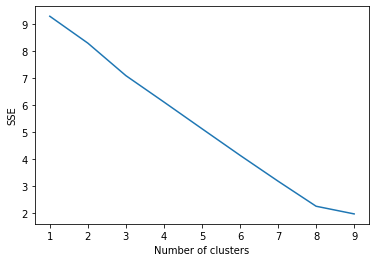

In [48]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(taipei_grouped.drop('District',axis=1))
    taipei_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [49]:
# set number of clusters 
Kclusters = 8

tp_grouped_clustering = taipei_grouped.drop('District', 1)

# run k-means clustering 
kmeans = KMeans(n_clusters=Kclusters, random_state = 0).fit(tp_grouped_clustering)

# check cluster labels generated for each row in the dataframe 
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 6, 1], dtype=int32)

We create a new dataframe that includes the clusters as well as the top 10 venues for each districts.

In [50]:
# ad clustering labels 
tp_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

taipei_merged = df_gtp

# merge taipei grouped with the dataframe to add the geo coordinations fro each district
taipei_merged = taipei_merged.join(tp_venues_sorted.set_index('District'), on='District')

taipei_merged = taipei_merged[taipei_merged['Cluster Labels'].notna()]
taipei_merged 

District  Postal Code   Longitude   Latitude  Population  Area_sq.km  \
0   Zhongzheng          100  121.519884  25.032405      162549      7.6071   
1       Datong          103  121.513042  25.063424      131029      5.6815   
2    Zhongshan          104  121.538160  25.069699      231286     13.6821   
3     Songshan          105  121.557588  25.059991      209689      9.2878   
4         Daan          106  121.543445  25.026770      312909     11.3614   
5       Wanhua          108  121.497986  25.028590      194314      8.8522   
6        Xinyi          110  121.571670  25.030621      229139     11.2077   
7       Shilin          111  121.550847  25.125467      290682     62.3682   
9        Neihu          114  121.592383  25.083706      287726     31.5787   
10     Nangang          115  121.609757  25.036009      122296     21.8424   
11     Wenshan          116  121.573608  24.988579      275433     31.5090   
12       Wanli          207  121.643931  25.175725       22634     63.3766   
13     Jinshan          208  121.605264  25.217146       22273     49.2132   
14     Banqiao          220  121.457968  25.011865      554008     23.1373   
15       Xizhi          221  121.654699  25.073313      196150     71.2354   
16    Shenkeng          222  121.620062  24.997675       23614     20.5787   
20    Shuangxi          227  121.832982  24.996984        9233    146.2484   
25      Yonghe          234  121.516745  25.008102      225353      5.7138   
26     Zhonghe          235  121.493674  24.990880      414356     20.1440   
27     Tucheng          236  121.445737  24.964251      238646     29.5578   
29      Shulin          238  121.401034  24.979706      184329     33.1288   
30      Yingge          239  121.346627  24.956626       87931     21.1248   
31    Sanchong          241  121.487098  25.062817      388386     16.3170   
32   Xinzhuang          242  121.436753  25.035830      413443     19.7383   
35      Luzhou          247  121.471246  25.089272      200055      8.3210   
39      Sanzhi          252  121.515558  25.231599       23452     65.9909   

    Density_sq.km  Cluster Labels 1st Most Common Venue  \
0         21368.0             0.0                  Café   
1         23062.0             0.0  Taiwanese Restaurant   
2         16904.0             0.0    Seafood Restaurant   
3         22577.0             0.0                  Café   
4         27541.0             0.0                  Café   
5         21951.0             0.0     Convenience Store   
6         20445.0             0.0        Scenic Lookout   
7          4661.0             3.0              Bus Stop   
9          9111.0             0.0           Coffee Shop   
10         5599.0             0.0     Convenience Store   
11         8741.0             0.0     Convenience Store   
12          357.0             5.0    Seafood Restaurant   
13          453.0             0.0           Snack Place   
14        23944.0             0.0             Bookstore   
15         2754.0             4.0        Breakfast Spot   
16         1147.0             1.0                  Café   
20           63.0             7.0         Women's Store   
25        39440.0             0.0           Coffee Shop   
26        20570.0             0.0           Coffee Shop   
27         8074.0             2.0                Garden   
29         5564.0             1.0            Food Truck   
30         4162.0             1.0      Asian Restaurant   
31        23803.0             0.0     Convenience Store   
32        20946.0             0.0             Pet Store   
35        24042.0             0.0           Coffee Shop   
39          355.0             6.0                  Park   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0      Dumpling Restaurant        Breakfast Spot               Theater   
1        Convenience Store          Dessert Shop  Gym / Fitness Center   
2        Convenience Store           Fish Market        Scenic Lookout   
3        

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(Kclusters)
ys = [i + x + (i*x)**2 for i in range(Kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(taipei_merged['Latitude'], taipei_merged['Longitude'], taipei_merged['District'], taipei_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### In case of the map not showing up !
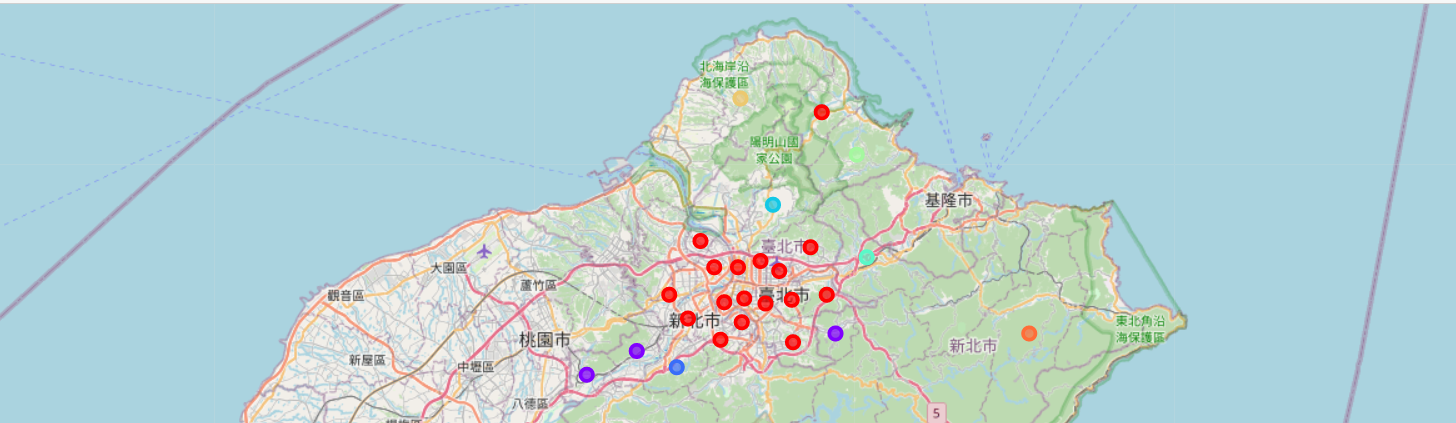

### Examine Clusers 

#### Cluster 1

In [52]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 0, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels  \
0   Zhongzheng      7.6071        21368.0             0.0   
1       Datong      5.6815        23062.0             0.0   
2    Zhongshan     13.6821        16904.0             0.0   
3     Songshan      9.2878        22577.0             0.0   
4         Daan     11.3614        27541.0             0.0   
5       Wanhua      8.8522        21951.0             0.0   
6        Xinyi     11.2077        20445.0             0.0   
9        Neihu     31.5787         9111.0             0.0   
10     Nangang     21.8424         5599.0             0.0   
11     Wenshan     31.5090         8741.0             0.0   
13     Jinshan     49.2132          453.0             0.0   
14     Banqiao     23.1373        23944.0             0.0   
25      Yonghe      5.7138        39440.0             0.0   
26     Zhonghe     20.1440        20570.0             0.0   
31    Sanchong     16.3170        23803.0             0.0   
32   Xinzhuang     19.7383        20946.0             0.0   
35      Luzhou      8.3210        24042.0             0.0   

   1st Most Common Venue   2nd Most Common Venue 3rd Most Common Venue  \
0                   Café     Dumpling Restaurant        Breakfast Spot   
1   Taiwanese Restaurant       Convenience Store          Dessert Shop   
2     Seafood Restaurant       Convenience Store           Fish Market   
3                   Café       Convenience Store  Taiwanese Restaurant   
4                   Café             Coffee Shop          Noodle House   
5      Convenience Store             Coffee Shop          Noodle House   
6         Scenic Lookout                    Park                  Café   
9            Coffee Shop     Japanese Restaurant     Convenience Store   
10     Convenience Store         Bubble Tea Shop           Supermarket   
11     Convenience Store             Coffee Shop    Chinese Restaurant   
13           Snack Place                   Hotel                  Farm   
14             Bookstore                    Café                 Hotel   
25           Coffee Shop       Convenience Store          Noodle House   
26           Coffee Shop               Pet Store  Taiwanese Restaurant   
31     Convenience Store      Chinese Restaurant                  Café   
32             Pet Store  Furniture / Home Store          Climbing Gym   
35           Coffee Shop     Fried Chicken Joint          Noodle House   

   4th Most Common Venue    5th Most Common Venue    6th Most Common Venue  \
0                Theater                   Bakery  Chinese Breakfast Place   
1   Gym / Fitness Center              Supermarket       Chinese Restaurant   
2         Scenic Lookout           Breakfast Spot                   Market   
3    Dumpling Restaurant       Italian Restaurant                   Bakery   
4   Taiwanese Restaurant  Chinese Breakfast Place           Farmers Market   
5                 Bakery              Supermarket     Fast Food Restaurant   
6      Convenience Store                 Mountain       Chinese Restaurant   
9     Italian Restaurant                Bookstore             Noodle House   
10              Sake Bar            Jewelry Store            Women's Store   
11      Asian Restaurant                     Café      Japanese Restaurant   
13   Dumpling Restaurant              Coffee Shop             Concert Hall   
14  Taiwanese Restaurant        Hotpot Restaurant                  Stadium   
25        Breakfast Spot        Hotpot Restaurant           Massage Studio   
26     Convenience Store            Bowling Alley                     Park   
31            Restaurant           Breakfast Spot            Women's Store   
32     Convenience Store               Food Court                     Café   
35         Metro Station                 Dive Bar             Concert Hall   

              7th Most Common Venue          8th Most Common Venue  \
0                      Concert Hall      Latin American Restaurant   
1                      Night 

#### Cluster 2

In [53]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 1, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
16  Shenkeng     20.5787         1147.0             1.0                  Café   
29    Shulin     33.1288         5564.0             1.0            Food Truck   
30    Yingge     21.1248         4162.0             1.0      Asian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
16  Taiwanese Restaurant        Farmers Market         Women's Store   
29         Women's Store   Dumpling Restaurant           Coffee Shop   
30            Food Truck         Women's Store   Dumpling Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
16              Dive Bar           Coffee Shop          Concert Hall   
29          Concert Hall     Convenience Store         Deli / Bodega   
30          Concert Hall     Convenience Store         Deli / Bodega   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
16     Convenience Store         Deli / Bodega       Department Store  
29      Department Store          Dessert Shop     Dim Sum Restaurant  
30      Department Store          Dessert Shop     Dim Sum Restaurant

#### Cluster 3

In [54]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 2, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
27  Tucheng     29.5578         8074.0             2.0                Garden   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
27         Women's Store   Dumpling Restaurant           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
27          Concert Hall     Convenience Store         Deli / Bodega   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
27      Department Store          Dessert Shop     Dim Sum Restaurant

#### Cluster 4

In [55]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 3, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
7   Shilin     62.3682         4661.0             3.0              Bus Stop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7         Women's Store   Dumpling Restaurant          Concert Hall   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7     Convenience Store         Deli / Bodega      Department Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7          Dessert Shop    Dim Sum Restaurant                  Diner

#### Cluster 5

In [56]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 4, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
15    Xizhi     71.2354         2754.0             4.0        Breakfast Spot   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
15         Women's Store   Dumpling Restaurant          Concert Hall   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
15     Convenience Store         Deli / Bodega      Department Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
15          Dessert Shop    Dim Sum Restaurant                  Diner

#### Cluster 6

In [57]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 5, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
12    Wanli     63.3766          357.0             5.0    Seafood Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
12         Women's Store              Dive Bar           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
12          Concert Hall     Convenience Store         Deli / Bodega   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
12      Department Store          Dessert Shop     Dim Sum Restaurant

#### Cluster 7

In [58]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 6, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
39   Sanzhi     65.9909          355.0             6.0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
39         Women's Store              Dive Bar           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
39          Concert Hall     Convenience Store         Deli / Bodega   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
39      Department Store          Dessert Shop     Dim Sum Restaurant

#### Cluster 8

In [59]:
taipei_merged.loc[taipei_merged['Cluster Labels'] == 7, taipei_merged.columns[[0] + list(range(5, taipei_merged.shape[1]))]]

District  Area_sq.km  Density_sq.km  Cluster Labels 1st Most Common Venue  \
20  Shuangxi    146.2484           63.0             7.0         Women's Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
20   Dumpling Restaurant           Coffee Shop          Concert Hall   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
20     Convenience Store         Deli / Bodega      Department Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
20          Dessert Shop    Dim Sum Restaurant                  Diner